# Librería para modelo Prophet

In [ ]:
!pip install prophet

# Código para hacer predicciones de cada subzona

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc5p3p6_2/t__2ulca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc5p3p6_2/bfp7b_wv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29215', 'data', 'file=/tmp/tmpc5p3p6_2/t__2ulca.json', 'init=/tmp/tmpc5p3p6_2/bfp7b_wv.json', 'output', 'file=/tmp/tmpc5p3p6_2/prophet_modelud1qaqnn/prophet_model-20241006161132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Datos cargados:
     month  precipitation         ds         y
0  2004-01       0.067736 2004-01-01  0.067736
1  2004-02       0.189581 2004-02-01  0.189581
2  2004-03       0.149661 2004-03-01  0.149661
3  2004-04       0.392661 2004-04-01  0.392661
4  2004-05       0.229707 2004-05-01  0.229707
Entrenando el modelo...
Haciendo predicciones para los próximos 12 meses...


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Resultados de las predicciones:
            ds      yhat
247 2024-07-31  0.111688
248 2024-08-31  0.140721
249 2024-09-30  0.218928
250 2024-10-31  0.237424
251 2024-11-30  0.213307


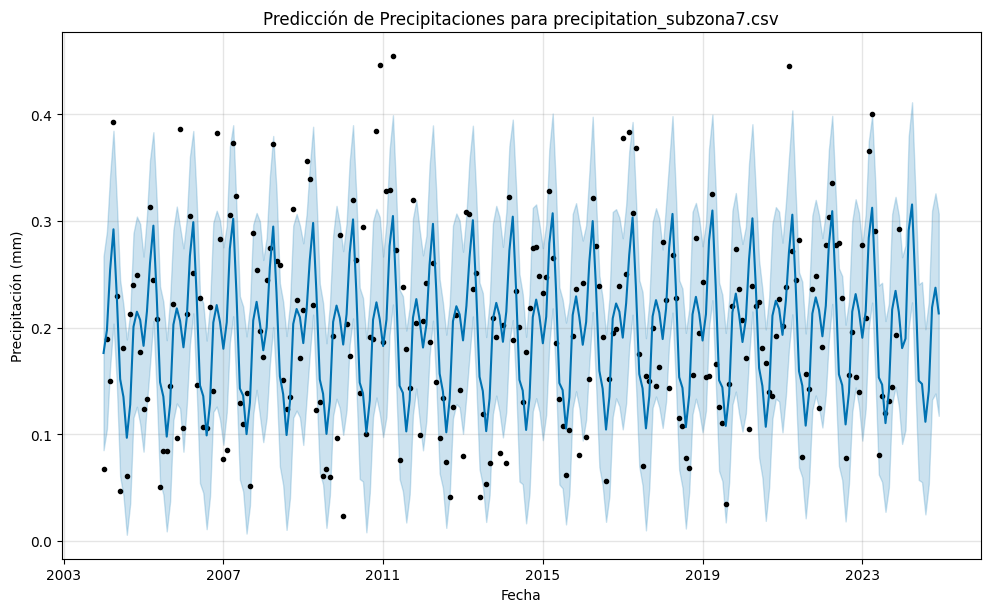

Predicciones guardadas en: precipitation_subzona7_predicciones.csv


In [74]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Función para realizar predicciones de precipitación usando Prophet y guardar en CSV
def predict_precipitation(subzona_csv, future_months=12):
    # Leer el archivo CSV de la subzona
    data = pd.read_csv(subzona_csv)

    # Asegurarse de que las columnas están en el formato correcto
    data['ds'] = pd.to_datetime(data['month'])  # Columna de fechas para Prophet
    data['y'] = data['precipitation']  # Columna de valores de precipitación

    # Verificar los primeros registros para asegurarse de que los datos están bien
    print("Datos cargados:")
    print(data.head())

    # Inicializar el modelo Prophet
    model = Prophet()

    # Ajustar el modelo con los datos históricos
    print("Entrenando el modelo...")
    model.fit(data)

    # Crear un dataframe con las fechas futuras que quieres predecir
    future = model.make_future_dataframe(periods=future_months, freq='M')

    # Hacer las predicciones
    print(f"Haciendo predicciones para los próximos {future_months} meses...")
    forecast = model.predict(future)

    # Mostrar los resultados (solo 'ds' y 'yhat')
    print("Resultados de las predicciones:")
    print(forecast[['ds', 'yhat']].tail())

    # Visualizar las predicciones
    model.plot(forecast)
    plt.title(f'Predicción de Precipitaciones para {subzona_csv}')
    plt.xlabel('Fecha')
    plt.ylabel('Precipitación (mm)')
    plt.show()

    # Guardar las predicciones en un nuevo archivo CSV (solo 'ds' y 'yhat')
    predicciones_csv = subzona_csv.replace('.csv', '_predicciones.csv')
    forecast[['ds', 'yhat']].to_csv(predicciones_csv, index=False)

    print(f"Predicciones guardadas en: {predicciones_csv}")
    return forecast

# Llamada a la función para la subzona 1
subzona_csv = 'precipitation_subzona7.csv'  # Este es tu archivo CSV
predicciones = predict_precipitation(subzona_csv, future_months=12)


# Librería para Streamlit y Ngrok

In [ ]:
!pip install streamlit
!pip install pyngrok


# Ingresar Token para Ngrok

In [19]:
!ngrok authtoken 2hjmpAUTdA1YmbTijbtq2Eof2ru_26w2c4x4ooizaQ3R1pdaf

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


# Iniciar servidor web Ngrok

In [242]:
# Lanzar el servidor de Streamlit con el puerto correcto (8504 en este caso)
def start_ngrok():
    public_url = ngrok.connect(8501)  # Cambia el puerto a 8504
    print(f"Accede a tu aplicación web aquí: {public_url}")

# Ejecutar Streamlit en segundo plano
!streamlit run app.py &> /dev/null&

# Conectar Streamlit a través de ngrok
start_ngrok()

Accede a tu aplicación web aquí: NgrokTunnel: "https://62a3-35-221-148-23.ngrok-free.app" -> "http://localhost:8501"


# Predicciones y página web

In [283]:
%%writefile app.py
import streamlit as st
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.dates as mdates  # Importar para controlar los ticks del eje X

def predict_precipitation(subzona_csv, future_months=12):
    # Leer el archivo CSV de la subzona
    data = pd.read_csv(subzona_csv)
    data['ds'] = pd.to_datetime(data['month'])
    data['y'] = data['precipitation']

    # Inicializar y ajustar el modelo Prophet
    model = Prophet()
    model.fit(data)

    # Generar las fechas futuras para la predicción (agregar 1 para evitar contar el último mes histórico)
    future = model.make_future_dataframe(periods=future_months + 1, freq='M')
    forecast = model.predict(future)

    # Filtrar para mantener solo las predicciones de los próximos meses sin incluir el último dato histórico
    forecast = forecast.tail(future_months)

    # Asegurar que la fecha actual esté incluida en la predicción
    fecha_actual = pd.to_datetime('today')  # Obtener la fecha actual
    forecast = forecast[forecast['ds'] >= fecha_actual]  # Filtrar fechas a partir de hoy

    # Guardar las predicciones en un archivo CSV (solo ds y yhat)
    predicciones_csv = subzona_csv.replace('.csv', '_predicciones.csv')
    forecast[['ds', 'yhat']].to_csv(predicciones_csv, index=False)

    return forecast  # Devolver todo el dataframe para usar en el gráfico y la tabla

def run_streamlit_app():

    # Cargar la imagen desde el sistema de archivos de Colab
    image = Image.open("/content/space.png")  # Asegúrate que la ruta sea correcta

    # Usar columnas vacías para centrar la imagen
    col1, col2, col3 = st.columns([1, 2, 1])  # Ajustar las proporciones de las columnas
    with col2:
        st.image(image, width=350)  # Ajustar el tamaño de la imagen

    # Texto centrado independiente de la imagen
    st.markdown(
        "<div style='text-align: center; font-size:12px;'>By SpaceInvaders</div>",
        unsafe_allow_html=True
    )

    # Texto centrado independiente de la imagen
    st.markdown(
        "<center><p><em>¡Hi!, Before you make a rainfall prediction, <br> you also click on this link, it will redirect you <br> to another site where you cold see previous <br> rainfalls data from 2014 to 2024.</em></p></center>",
        unsafe_allow_html=True
    )


    # Botón "Historical Rainfall" centrado con fondo celeste y letras blancas
    st.markdown(
        """
        <div style="display: flex; justify-content: center; margin-top: 20px;">
            <a href="https://savvy-parser-437715-t1.projects.earthengine.app/view/nasa" target="_blank" style="background-color: #00BFFF; color: white; padding: 10px 20px; text-align: center; text-decoration: none; border-radius: 5px;">
                Historical Rainfall
            </a>
        </div>
        """,
        unsafe_allow_html=True
    )

     # Texto centrado independiente de la imagen
    st.markdown(
        "<hr>",
        unsafe_allow_html=True
    )

    st.markdown(
        "<h1 style='color: #21a8d5; text-align: center; font-size: 25px;'>RAINFALL PREDICTION SYSTEM</h1>",
        unsafe_allow_html=True
    )

    with open("/content/mapa.html", "r") as file:
        html_content = file.read()

    # Envuelve el contenido en un div centrado
    centered_html = f"""
    <div style="display: flex; justify-content: center; align-items: center; flex-direction: column;">
        {html_content}
    </div>
    """

    # Muestra el HTML centrado en Streamlit
    st.markdown(centered_html, unsafe_allow_html=True)

    # Agregar un slider para seleccionar los meses a predecir
    future_months = st.slider('Selecciona el número de meses a predecir:', min_value=1, max_value=12, value=1)

    st.write("Selecciona una subzona para realizar la predicción:")

    # Crear una lista de nombres de archivos CSV para cada subzona
    subzonas = {
        "Subzona 1": "precipitation_subzona1.csv",
        "Subzona 2": "precipitation_subzona2.csv",
        "Subzona 3": "precipitation_subzona3.csv",
        "Subzona 4": "precipitation_subzona4.csv",
        "Subzona 5": "precipitation_subzona5.csv",
        "Subzona 6": "precipitation_subzona6.csv",
        "Subzona 7": "precipitation_subzona7.csv",
        "Subzona 8": "precipitation_subzona8.csv",
        "Subzona 9": "precipitation_subzona9.csv",
        "Subzona 10": "precipitation_subzona10.csv",
        "Subzona 11": "precipitation_subzona11.csv",
        "Subzona 12": "precipitation_subzona12.csv"
    }

    # Pestaña para seleccionar la subzona (selectbox)
    subzona_seleccionada = st.selectbox(
        "Selecciona la subzona",
        list(subzonas.keys())  # Mostrar solo los nombres de las subzonas
    )

    # Obtener el archivo CSV correspondiente a la subzona seleccionada
    archivo_csv = subzonas[subzona_seleccionada]

    # Botón para hacer la predicción
    if st.button('Hacer predicción'):
        st.write(f"Generando predicciones para {subzona_seleccionada} para los próximos {future_months} meses a partir de hoy...")

        # Hacer la predicción
        predicciones = predict_precipitation(archivo_csv, future_months)

        # Renombrar las columnas para visualización en la tabla
        predicciones = predicciones.rename(columns={'ds': 'Fecha', 'yhat': 'Precipitación (mm/hr)'})

        # Mostrar las predicciones completas (solo Fecha y Precipitación en la tabla)
        st.write("Resultados de las predicciones:")
        st.write(predicciones[['Fecha', 'Precipitación (mm/hr)']])

        # Gráfico de predicciones
        fig, ax = plt.subplots()
        ax.plot(predicciones['Fecha'], predicciones['Precipitación (mm/hr)'], label='Predicción')
        ax.fill_between(predicciones['Fecha'], predicciones['yhat_lower'], predicciones['yhat_upper'], alpha=0.2, label='Intervalo de confianza')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Precipitación (mm/hr)')
        ax.set_title(f'Predicción de Precipitaciones para {subzona_seleccionada}')

        # Formatear los ticks del eje X
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
        plt.xticks(rotation=45)

        # Mostrar gráfico en Streamlit
        st.pyplot(fig)

        # Mostrar mensaje de éxito al guardar el CSV
        st.write(f"Predicciones guardadas en: {archivo_csv.replace('.csv', '_predicciones.csv')}")

    # Pie de página centrado
    st.markdown("---")

    footer_html = """
    <div style="text-align: center;">
        <strong>PROJECT-BUYS</strong><br>
        <strong>Guacan Erick</strong><br>
        <strong>Hinojosa David</strong><br>
        <strong>Lopez Jhonatan</strong><br>
        <strong>Montezuma Diego</strong><br>
        <strong>Narváez Israel</strong><br>
        <strong>Yacelga Jorge</strong><br>
        Follow us on <a href="https://www.instagram.com/project.buys?igsh=MXR2YXhpYXJhMWxoeg==" target="_blank">Instagram</a>
    </div>
    """

    # Muestra el pie de página centrado
    st.markdown(footer_html, unsafe_allow_html=True)
# Ejecutar la aplicación Streamlit
if __name__ == '__main__':
    run_streamlit_app()


Overwriting app.py


In [284]:
!zip -r /content/contenido.zip /content


  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2024.10.03/ (stored 0%)
  adding: content/.config/logs/2024.10.03/13.24.27.913856.log (deflated 58%)
  adding: content/.config/logs/2024.10.03/13.24.16.945701.log (deflated 58%)
  adding: content/.config/logs/2024.10.03/13.24.37.784488.log (deflated 57%)
  adding: content/.config/logs/2024.10.03/13.24.38.390038.log (deflated 56%)


In [285]:
from google.colab import files
files.download('/content/contenido.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>